
<a href='https://huntsman.usu.edu/directory/jahangiry-pedram'> <img src="logo.jpg" /></a>
___
## Pedram Jahangiry

# Time series with Pandas in Python

In this section we are going to learn how to handle time series data in Python:

Basic topics to be covered:

* datetime module
* numpy datetime arrays
* pandas datetime
* pandas datareader
    1. Resampling
    2. Time shifting (leads and lags)
    3. Rolling windows and Expanding windows
   

#### datetime module

In [1]:
from datetime import datetime

In [2]:
year =2021
month= 1
day =1

In [3]:
my_date = datetime(year, month, day)
my_date

datetime.datetime(2021, 1, 1, 0, 0)

In [4]:
# we can extract any information from our datetime object. 
my_date.month

1

In [5]:
my_date.isoweekday()
# Monday == 1 ... Sunday == 7 so 5 means Friday

5

#### Numpy datetime arrays
NumPy handles dates more efficiently than Python's datetime format.
The NumPy data type is called datetime64 to distinguish it from Python's datetime.


In [6]:
import numpy as np

In [7]:
# creating datetime array
np.array(['2020-01-20', '2021-01-20'], dtype='datetime64')

array(['2020-01-20', '2021-01-20'], dtype='datetime64[D]')

In [8]:
np.array(['2020-01-20', '2021-01-20'], dtype='datetime64[Y]')

array(['2020', '2021'], dtype='datetime64[Y]')

In [9]:
# np.arange(start, stop, step)
np.arange('2021-01-01', '2021-01-10', dtype='datetime64[D]')

array(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
       '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
       '2021-01-09'], dtype='datetime64[D]')

#### Pandas datetime
Usually we will work with time series as a datetime index in pandas dataframes. pandas has a lot of built in functions and methods to work with time series!

In [10]:
import pandas as pd

In [11]:
# let's creat an index first. For example the first week of 2021
index = pd.date_range('2020-01-01', periods=7, freq='D')
index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07'],
              dtype='datetime64[ns]', freq='D')

here is a list of frequency parameters: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

In [12]:
# if you want to create an index for specific days, there are two ways to do that:
custom_index = pd.to_datetime(['2021-01-06', '2021-01-21'])
custom_index

DatetimeIndex(['2021-01-06', '2021-01-21'], dtype='datetime64[ns]', freq=None)

In [13]:
# or alternatively, we could pass a numpy array to pd.DatetimeIndex()
custom_index = pd.DatetimeIndex(np.array(['2021-01-01', '2021-01-19']))
custom_index 

DatetimeIndex(['2021-01-01', '2021-01-19'], dtype='datetime64[ns]', freq=None)

Now let's explore some of pandas datetime functions:

In [14]:
# creating a time series data frame
# pd.DateFrame( data, index, column names)
df = pd.DataFrame(['first day of the year', 'first day of school'], custom_index, ['Event'])
df

,Event
2021-01-01,first day of the year
2021-01-19,first day of school


In [15]:
df.columns

Index(['Event'], dtype='object')

In [16]:
df.index

DatetimeIndex(['2021-01-01', '2021-01-19'], dtype='datetime64[ns]', freq=None)

In [17]:
df.index.max()

Timestamp('2021-01-19 00:00:00')

In [18]:
df.index.argmax()

1

#### Pandas datareader

In [19]:
import pandas_datareader.data as web

In [20]:
start = pd.to_datetime('2020-01-01')
end   = pd.to_datetime('today')

In [21]:
Ticker =  "TSLA AAPL".split(" ")
Ticker

['TSLA', 'AAPL']

In [23]:
Stocks = web.DataReader(name= Ticker, data_source= 'yahoo', start=start, end= end)
Stocks.tail()

C:\Users\Pedram\anaconda3\lib\site-packages\pandas_datareader\base.py:272: SymbolWarning: Failed to read symbol: 'TSLA', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
C:\Users\Pedram\anaconda3\lib\site-packages\pandas_datareader\base.py:272: SymbolWarning: Failed to read symbol: 'AAPL', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)


RemoteDataError: No data fetched using 'YahooDailyReader'

In [ ]:
df= round(Stocks['Adj Close'],2)
df.tail()

In [24]:
import matplotlib.pyplot as plt

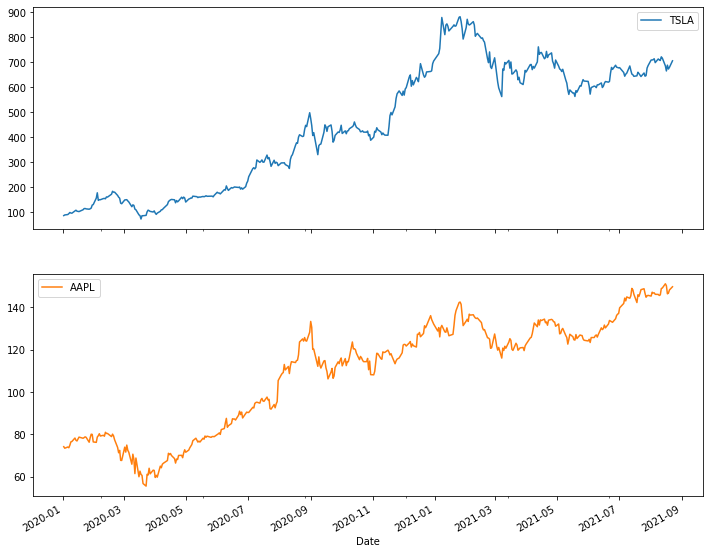

In [25]:
df.plot(subplots=True, figsize=(12,10))
plt.show()

In [26]:
df.index

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2021-08-10', '2021-08-11', '2021-08-12', '2021-08-13',
               '2021-08-16', '2021-08-17', '2021-08-18', '2021-08-19',
               '2021-08-20', '2021-08-23'],
              dtype='datetime64[ns]', name='Date', length=414, freq=None)

#### 1.Resampling
Resampling data by different rules (frequencies). Here is the list of frequencies: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

In [27]:
# example: resampling data by month end frequency
df.resample(rule='M').mean()

Symbols,TSLA,AAPL
Date,,
2020-01-31,105.730952,76.950476
2020-02-29,159.489474,76.934737
2020-03-31,111.820455,64.897727
2020-04-30,132.719524,67.356667
2020-05-31,159.885000,76.811500
2020-06-30,192.708636,85.743636
2020-07-31,292.028636,94.784545
2020-08-31,360.060000,116.513333
2020-09-30,413.495238,114.389524


you can resample based on custom resampling functions as well

**example 1: plot the normalized monthly average price.**

In [28]:
df.resample(rule='M').mean().apply(lambda x: x/x[0])

Symbols,TSLA,AAPL
Date,,
2020-01-31,1.000000,1.000000
2020-02-29,1.508446,0.999795
2020-03-31,1.057594,0.843370
2020-04-30,1.255257,0.875325
2020-05-31,1.512187,0.998194
2020-06-30,1.822632,1.114270
2020-07-31,2.761998,1.231760
2020-08-31,3.405436,1.514134
2020-09-30,3.910825,1.486534


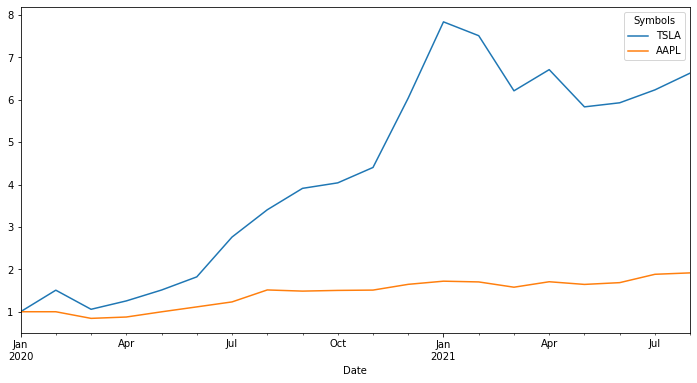

In [29]:
df.resample(rule='M').mean().apply(lambda x: x/x[0]).plot(figsize=(12,6))
plt.show()

In [30]:
# example 2: draw a barplot comparing monthly returns between Tesla and Apple

df.resample(rule='M').apply(lambda x : x[-1]/x[0]-1)

Symbols,TSLA,AAPL
Date,,
2020-01-31,0.512028,0.030499
2020-02-29,-0.143590,-0.112278
2020-03-31,-0.295320,-0.149005
2020-04-30,0.623715,0.219574
2020-05-31,0.190646,0.102826
2020-06-30,0.202316,0.133459
2020-07-31,0.277855,0.167368
2020-08-31,0.677845,0.186673
2020-09-30,-0.096916,-0.136889


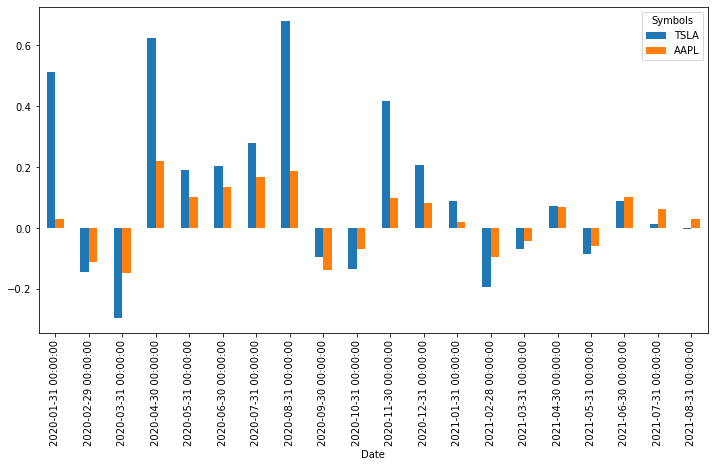

In [31]:
df.resample(rule='M').apply(lambda x : x[-1]/x[0]-1).plot.bar(figsize=(12,6))
plt.show()

#### 2. Time shifting (leads and lags)


In [32]:
# shift forward
df_apple= pd.DataFrame(df['AAPL'])
df_apple.head()

,AAPL
Date,
2020-01-02,74.10
2020-01-03,73.38
2020-01-06,73.96
2020-01-07,73.61
2020-01-08,74.80


In [33]:
df_apple['lag(t-1)']= df_apple['AAPL'].shift(1)
df_apple['lead(t+1)']= df_apple['AAPL'].shift(-1)

df_apple.head()

,AAPL,lag(t-1),lead(t+1)
Date,,,
2020-01-02,74.10,NaN,73.38
2020-01-03,73.38,74.10,73.96
2020-01-06,73.96,73.38,73.61
2020-01-07,73.61,73.96,74.80
2020-01-08,74.80,73.61,76.39


#### 3. Rolling windows and Expanding windows

Let's construct a 30 day simple moving averages for Tesla!

In [34]:
df.head()

Symbols,TSLA,AAPL
Date,,
2020-01-02,86.05,74.10
2020-01-03,88.60,73.38
2020-01-06,90.31,73.96
2020-01-07,93.81,73.61
2020-01-08,98.43,74.80


In [35]:
df.rolling(window=5).mean().head()

Symbols,TSLA,AAPL
Date,,
2020-01-02,NaN,NaN
2020-01-03,NaN,NaN
2020-01-06,NaN,NaN
2020-01-07,NaN,NaN
2020-01-08,91.44,73.97


In [36]:
df['TSLA_MA(30)']=df['TSLA'].rolling(30).mean()

In [37]:
df.head()

Symbols,TSLA,AAPL,TSLA_MA(30)
Date,,,
2020-01-02,86.05,74.10,NaN
2020-01-03,88.60,73.38,NaN
2020-01-06,90.31,73.96,NaN
2020-01-07,93.81,73.61,NaN
2020-01-08,98.43,74.80,NaN


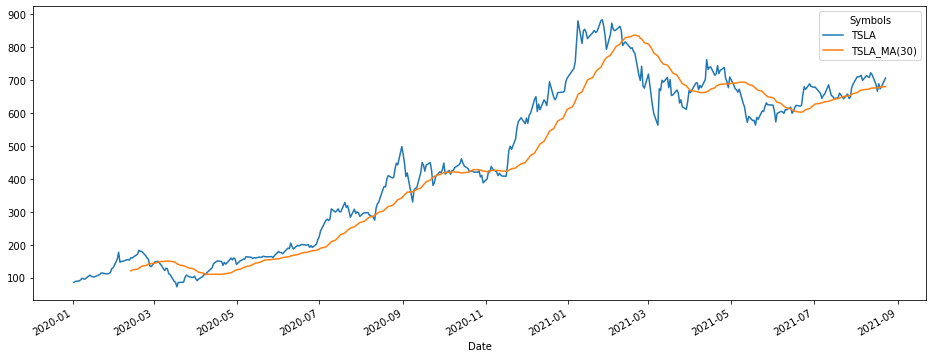

In [38]:
df[['TSLA', 'TSLA_MA(30)']].plot(figsize=(16,6))

plt.show()

Let's construct an expanding averages for AAPL!

In [39]:
df['AAPL'].head()

Date
2020-01-02    74.10
2020-01-03    73.38
2020-01-06    73.96
2020-01-07    73.61
2020-01-08    74.80
Name: AAPL, dtype: float64

In [40]:
df['AAPL'].expanding().mean().head()

Date
2020-01-02    74.100000
2020-01-03    73.740000
2020-01-06    73.813333
2020-01-07    73.762500
2020-01-08    73.970000
Name: AAPL, dtype: float64

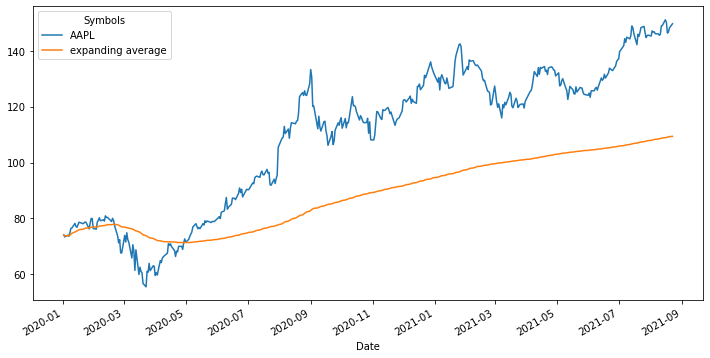

In [41]:
df['expanding average']=df['AAPL'].expanding().mean()
df[['AAPL','expanding average']].plot(figsize=(12,6))

plt.show()